In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,6

In [ ]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print(data.dtypes)
print(data.shape)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
Month          object
#Passengers     int64
dtype: object
(144, 2)


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [ ]:
data = pd.read_csv('AirPassengers.csv', 
                   parse_dates=['Month'], 
                   index_col='Month', 
                   date_parser=dateparse)

print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_46644/2674265005.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [ ]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

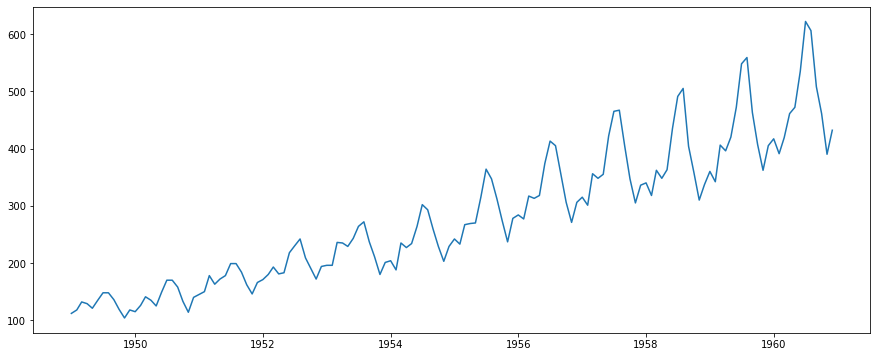

In [ ]:
plt.plot(ts)

In [ ]:
from pandas import read_csv

X_new = data.values
split = len(X_new)/2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1,mean2))
print('variance1=%f, variance2=%f' % (var1,var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


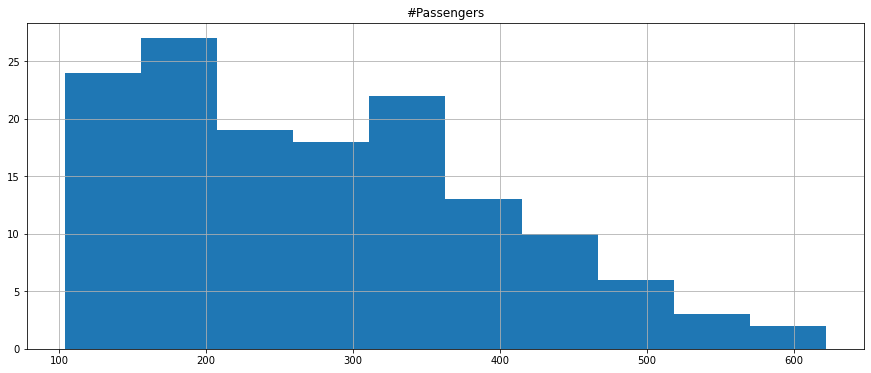

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
data.hist()
pyplot.show()

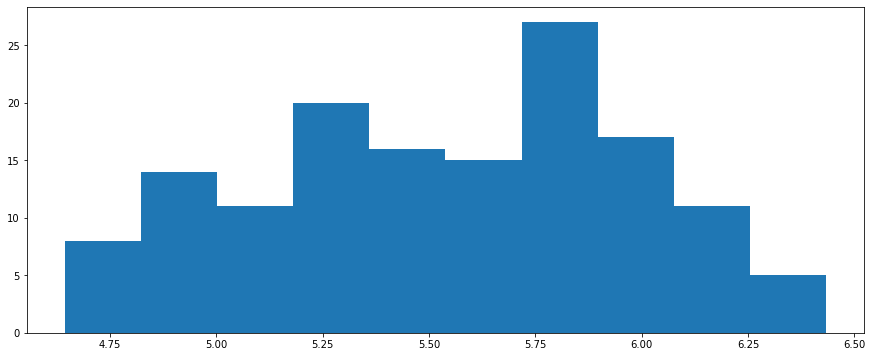

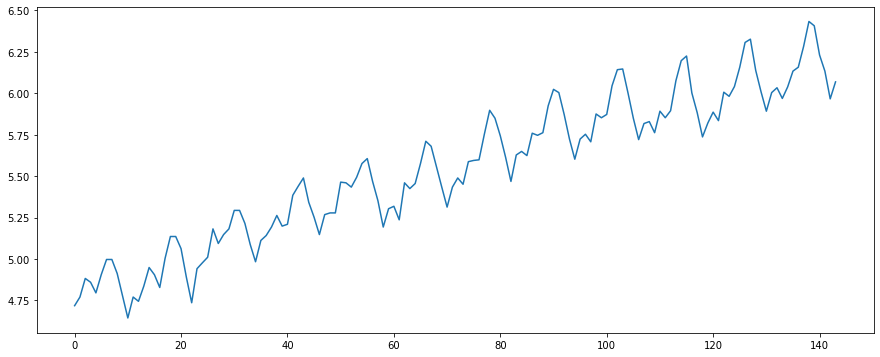

In [ ]:
## as data is not stationary. we will convert it into Log transformation
from numpy import log
X_log = log(data.values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

In [ ]:
X_new_log = data.values
X_new_log = log(X_new_log)
split_log = len(X_new_log)/2
X1, X2 = X_new_log[0:int(split_log)], X_new_log[int(split_log):]
mean1_log, mean2_log = X1.mean(), X2.mean()
var1_log, var2_log = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1_log,mean2_log))
print('variance1=%f, variance2=%f' % (var1_log,var2_log))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


In [ ]:
## STATISTICAL TEST

In [ ]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling stats
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(timeseries, color='red', label='Rolling Mean')
    std  = plt.plot(timeseries, color='black', label='Rolling std')

    plt.legend(loc='best')
    plt.title("Rolling mean & Standard Deviation")
    plt.show(block=False)

    #perform dicky fuller test
    print('Results of dicky fuller test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statstic', 'p-value', '#Lags used', 'Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key] = value
    print(dfoutput)


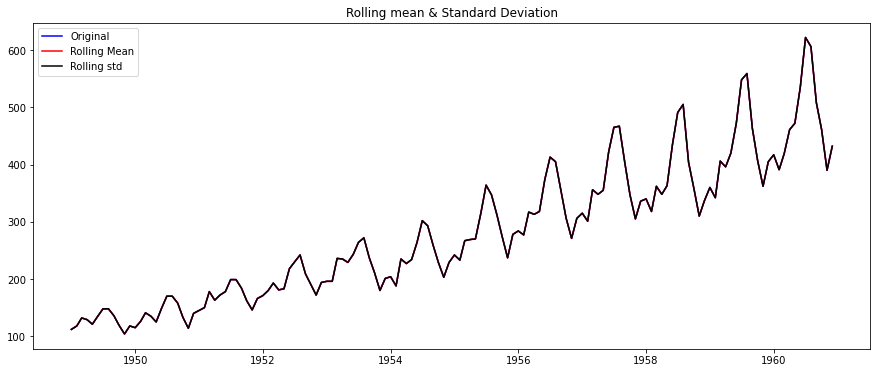

Results of dicky fuller test: 
Test Statstic                   0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
critical value (1%)            -3.481682
critical value (5%)            -2.884042
critical value (10%)           -2.578770
dtype: float64


In [ ]:
test_stationarity(ts)

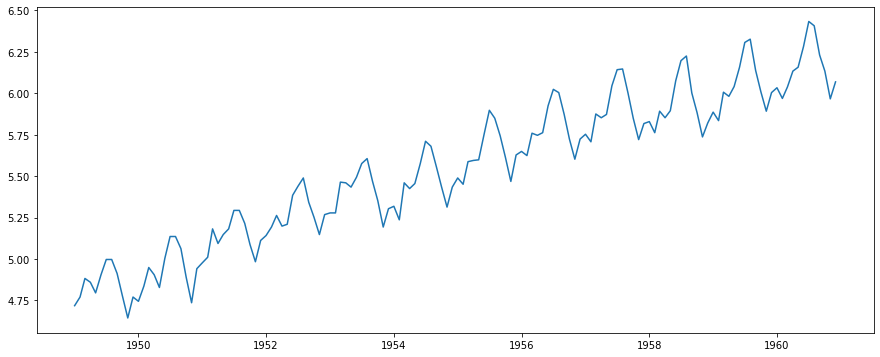

In [ ]:
# we have to check Test Statstic should be lesser than critical value (1%). If its not, then data is not stationary.
# performing transformation

ts_log = np.log(ts)

plt.plot(ts_log)


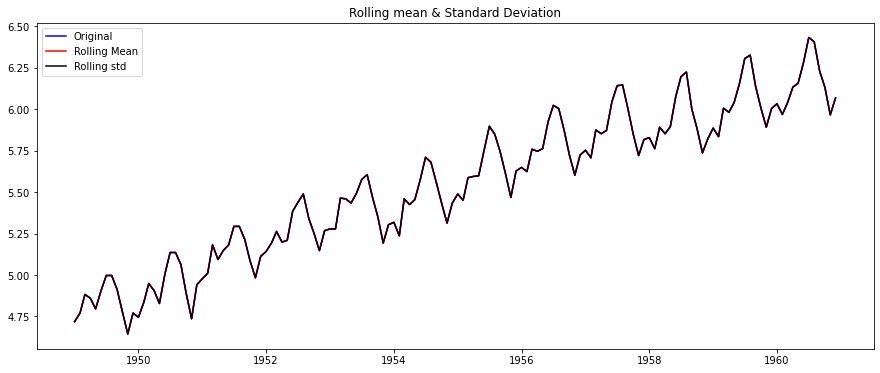

Results of dicky fuller test: 
Test Statstic                  -1.717017
p-value                         0.422367
#Lags used                     13.000000
Number of observation used    130.000000
critical value (1%)            -3.481682
critical value (5%)            -2.884042
critical value (10%)           -2.578770
dtype: float64


In [ ]:
test_stationarity(ts_log)

In [ ]:
# as we can see with the log transform, Test Statstic is still not less than critical value (1%). So the data is still not stationary.
## Lets apply other technoque called smoothing.

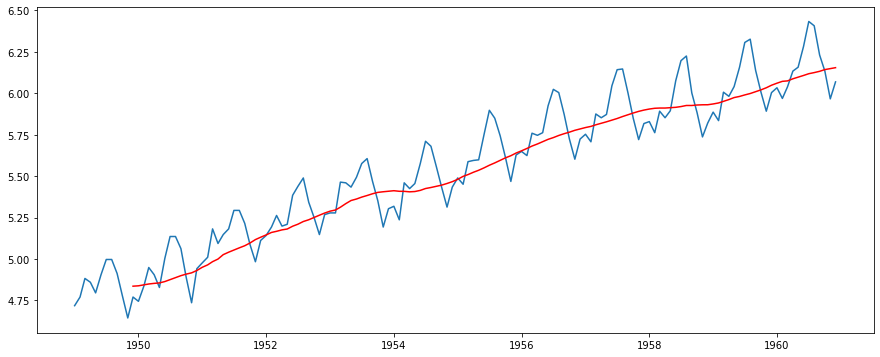

In [ ]:
# smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

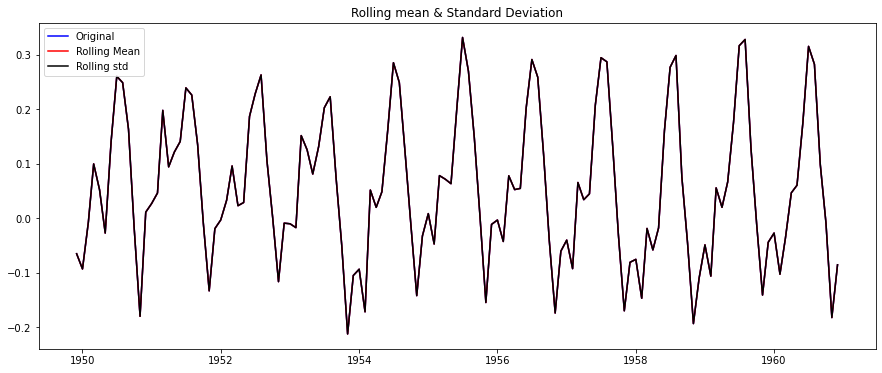

Results of dicky fuller test: 
Test Statstic                  -3.162908
p-value                         0.022235
#Lags used                     13.000000
Number of observation used    119.000000
critical value (1%)            -3.486535
critical value (5%)            -2.886151
critical value (10%)           -2.579896
dtype: float64


In [ ]:
# Test stationarity again
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
# here Test Statstic is less than critical value (5%). which means data is 95% confidence that it is stationary.
# if Test Statstic has been less than critical value (1%) then it should have been 99% stationary.

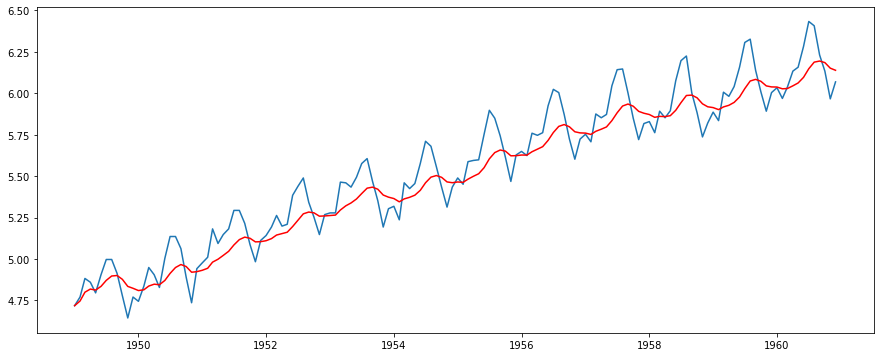

In [ ]:
expwighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

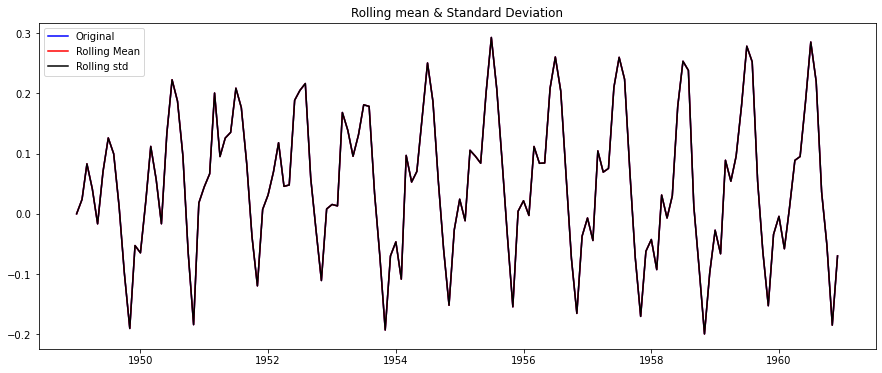

Results of dicky fuller test: 
Test Statstic                  -3.310542
p-value                         0.014414
#Lags used                     13.000000
Number of observation used    130.000000
critical value (1%)            -3.481682
critical value (5%)            -2.884042
critical value (10%)           -2.578770
dtype: float64


In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

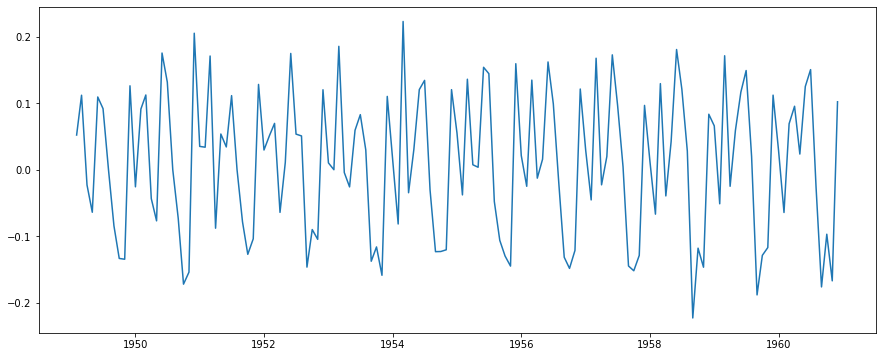

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


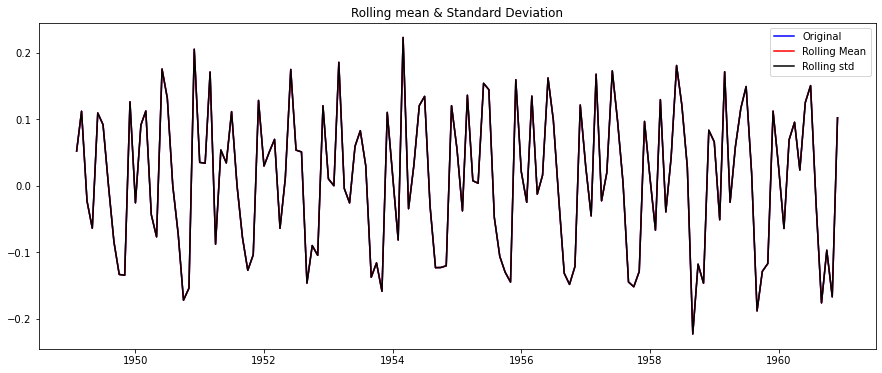

Results of dicky fuller test: 
Test Statstic                  -2.717131
p-value                         0.071121
#Lags used                     14.000000
Number of observation used    128.000000
critical value (1%)            -3.482501
critical value (5%)            -2.884398
critical value (10%)           -2.578960
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
# Finding the Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

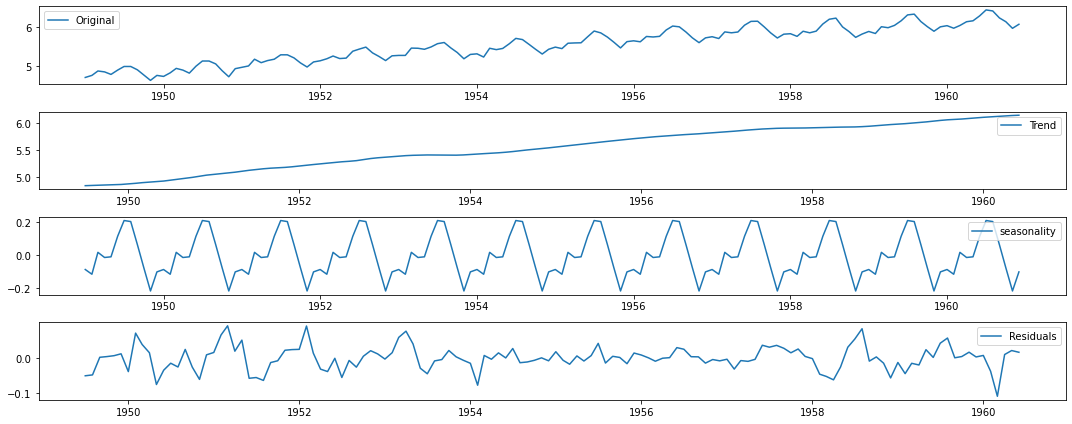

In [ ]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

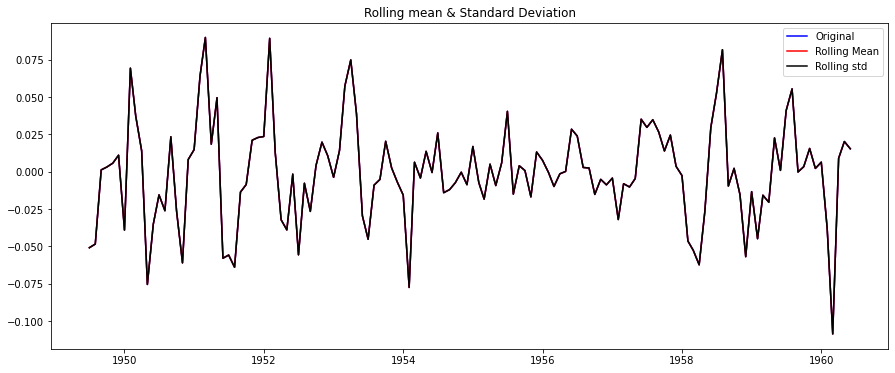

Results of dicky fuller test: 
Test Statstic                -6.332387e+00
p-value                       2.885059e-08
#Lags used                    9.000000e+00
Number of observation used    1.220000e+02
critical value (1%)          -3.485122e+00
critical value (5%)          -2.885538e+00
critical value (10%)         -2.579569e+00
dtype: float64


In [ ]:
# Converting residuals into a data frame.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

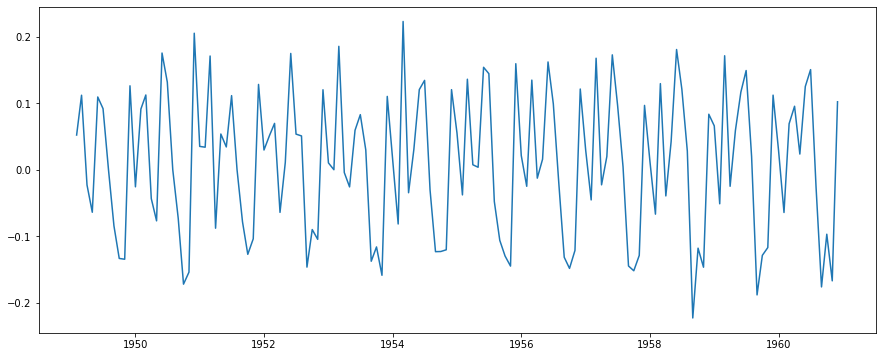

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

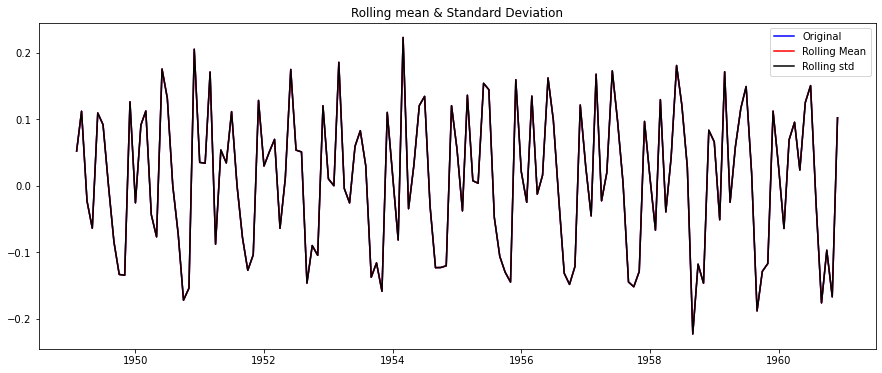

Results of dicky fuller test: 
Test Statstic                  -2.717131
p-value                         0.071121
#Lags used                     14.000000
Number of observation used    128.000000
critical value (1%)            -3.482501
critical value (5%)            -2.884398
critical value (10%)           -2.578960
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
# we can say Test Statstic is very less than critical values.
# We can say that residual data is stationary with 99% confidence.

In [ ]:
# Final forecasting
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# Plot ACF/ PACF
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

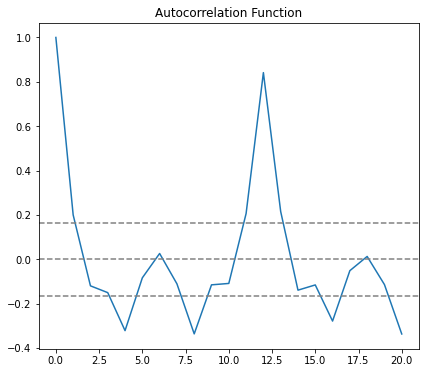

In [ ]:
# plot ACF

plt.subplot(121)
plt.plot(lag_acf)

plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

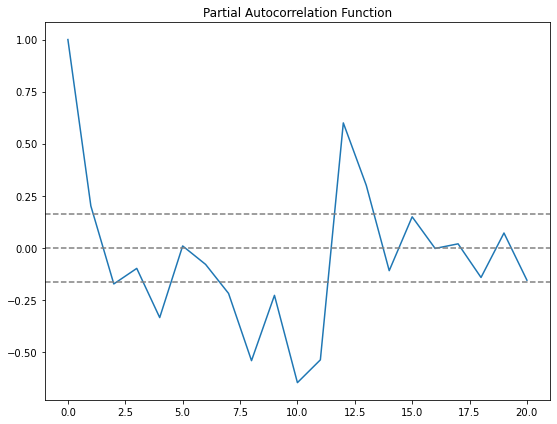

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
# BUT ACF and PACF is not used.
ts_values=ts_log.values

In [ ]:
X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [ ]:
#MODEL BUILDING
#training will be 66%, test will be 33% as per our model

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [ ]:
history = [x for x in train]
predictions = list()

In [112]:
### we have to put best (p,q,d) values which we have identify from grid search at the last.
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)

predicted=5.826962, expected=5.752573
predicted=5.820229, expected=5.707110
predicted=5.813632, expected=5.874931
predicted=5.935527, expected=5.852202
predicted=5.869256, expected=5.872118
predicted=5.934115, expected=6.045005
predicted=6.015581, expected=6.142037
predicted=6.099584, expected=6.146329
predicted=6.073973, expected=6.001415
predicted=5.912702, expected=5.849325
predicted=5.825926, expected=5.720312
predicted=5.748151, expected=5.817111
predicted=5.931413, expected=5.828946
predicted=5.910092, expected=5.762051
predicted=5.892269, expected=5.891644
predicted=5.986697, expected=5.852202
predicted=5.791961, expected=5.894403
predicted=5.981802, expected=6.075346
predicted=6.098715, expected=6.196444
predicted=6.210424, expected=6.224558
predicted=6.178270, expected=6.001415
predicted=5.938663, expected=5.883322
predicted=5.910677, expected=5.736572
predicted=5.778839, expected=5.820083
predicted=5.998324, expected=5.886104
predicted=5.983905, expected=5.834811
predicted=5.

In [113]:
#CHECKING ERROR
from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

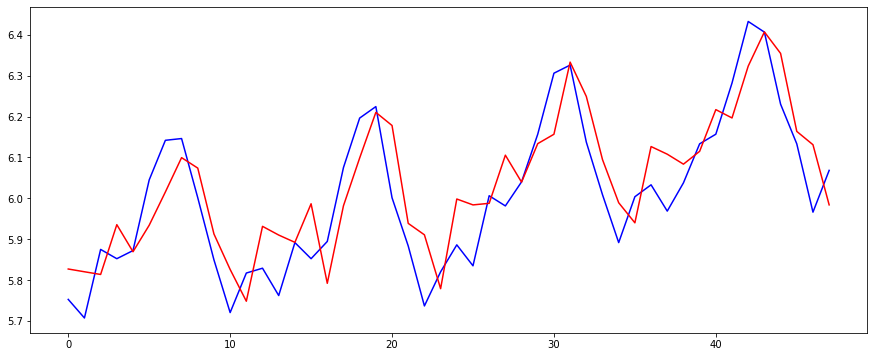

In [114]:
# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

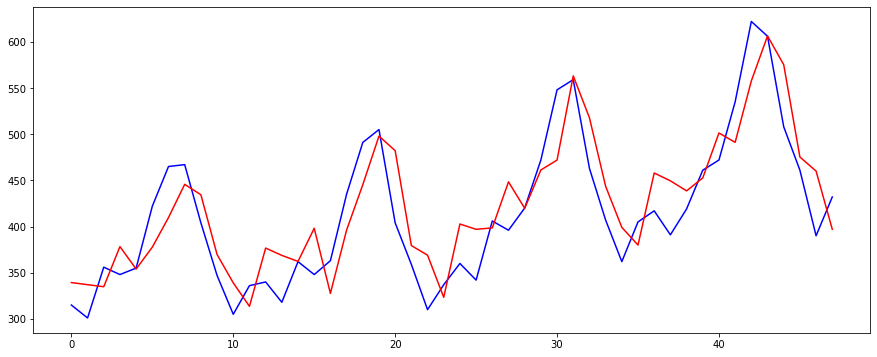

In [115]:
# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')   
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

In [116]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 39.94


In [117]:
## Auto ARIMA
from pmdarima.arima import auto_arima

In [118]:
arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1, 
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1, 
                         seasonal=True, stationary=False, information_criterion='aic', 
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, 
                         n_jobs=1, start_params=None, trend=None, method='lbfgs', 
                         maxiter=50, offset_test_args=None, seasonal_test_args=None, 
                         suppress_warnings=True, error_action='trace', trace=False, 
                         random=False, random_state=None, n_fits=10, 
                         return_valid_fits=False, out_of_sample_size=0, 
                         scoring='mse', scoring_args=None, with_intercept='auto', 
                         sarimax_kwargs=None)

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(1, 1, 4)   Log Likelihood                  97.600
Date:                Tue, 08 Feb 2022   AIC                           -181.199
Time:                        17:51:10   BIC                           -163.322
Sample:                             0   HQIC                          -173.976
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0127      0.003      4.199      0.000       0.007       0.019
ar.L1         -0.1288      0.257     -0.502      0.616      -0.632       0.374
ma.L1          0.0963      0.274      0.351      0.726      -0.441       0.634
ma.L2         -0.3158      0.175     -1.807      0.071      -0.658       0.027
ma.L3         -0.2620      0.175     -1.499      0.134      -0.605       0.081
ma.L4         -0.4595      0.144     -3.188      0.001      -0.742      -0.177
sigma2         0.0073      0.002      3.770      0.000       0.004       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.63
Prob(Q):                              0.99   Prob(JB):                         0.10
Heteroskedasticity (H):               0.93   Skew:                             0.28
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['predicted_sales']

In [ ]:
np.exp(prediction_arima_model)  

,predicted_sales
0,336.259008
1,351.230397
2,366.640115
3,358.731845
4,364.343585
5,368.267662
6,372.464739
7,376.679574
8,380.946022
9,385.260284


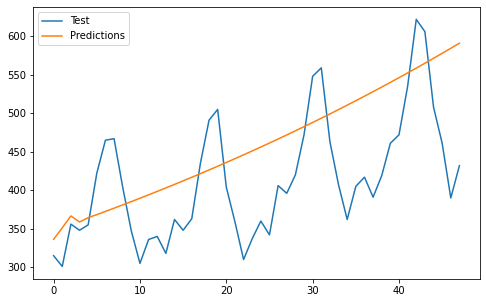

In [ ]:
plt.figure(figsize=(8,5))
#plt.plot(train, label='Training')
plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
## GRID SEARCH
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.8)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
import datetime
print(datetime.datetime.now())
p_values = [1,2,3,4,5]
d_values = [0,1]
q_values = [1,2,3]
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2022-02-08 17:51:10.580663
ARIMA(1, 0, 1) MSE=0.012
ARIMA(1, 0, 3) MSE=0.042
ARIMA(1, 1, 1) MSE=0.013
ARIMA(1, 1, 2) MSE=0.009
ARIMA(1, 1, 3) MSE=0.009
ARIMA(2, 0, 1) MSE=0.011
ARIMA(2, 0, 2) MSE=0.011
ARIMA(2, 1, 1) MSE=0.008
ARIMA(2, 1, 2) MSE=0.008
ARIMA(2, 1, 3) MSE=0.009
ARIMA(3, 0, 1) MSE=0.011
ARIMA(3, 0, 2) MSE=0.008
ARIMA(3, 1, 1) MSE=0.008
ARIMA(3, 1, 2) MSE=0.007
ARIMA(4, 0, 1) MSE=0.011
ARIMA(4, 1, 1) MSE=0.007
ARIMA(4, 1, 2) MSE=0.007
ARIMA(5, 0, 1) MSE=0.010
ARIMA(5, 0, 3) MSE=0.007
ARIMA(5, 1, 1) MSE=0.007
Best ARIMA(4, 1, 2) MSE=0.007
2022-02-08 17:53:25.953093
